# TP - HMMA238

Par Mathias Gout et Julie Røste.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["figure.figsize"] = (17,8)

## Exercice 1 - Le jeu de la vie

### Question 4:

In [2]:
from utils import calcul_nb_voisins
from utils import iteration_jeu
Z_init = [[0,0,0,0,0,0], 
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
     

calcul_nb_voisins(Z_init)

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

`calcul_nb_voisins(Z)` affiche le nombre de voisins vivants de chaque cellules

### Question 5:

In [3]:
Z_init

[[0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

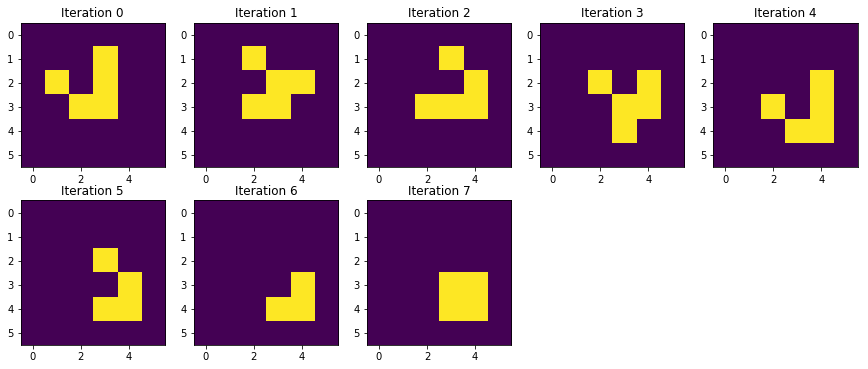

In [7]:
def plotJeuDeLaVie(nbIterations,Z,iter_func):
    """
    Plotting the evolution of the matrices of Jeu de La Vie.
    """
    Zcopy = Z.copy()
    plt.figure(figsize=(15,6))
    plt.subplot(2,5,1)
    plt.title("Iteration 0")
    plt.imshow(Zcopy)
    for i in range(2,nbIterations+1):
        plt.subplot(2,5,i)
        Zcopy = iter_func(Zcopy)
        plt.title("Iteration "+str(i-1))
        plt.imshow(Zcopy)

plotJeuDeLaVie(8,np.asarray(Z_init),iteration_jeu)

### Question 6:

On remarque que les cellules vivantes de l'itération 0 sont disposées de la même façon que celles de l'itération 4. 
<br/>Entre l'itération 0 et 4, les cellules vivantes se sont toutes déplacées d'une cellule en bas et d'une cellule à droite.

A partir de l'itération 7, les cellules ne changent plus d'état. 
Les quatres cellules vivantes sont regroupées en bas à droite et ont toutes 3 voisins vivants (aucun décès possible).
<br/>Comme aucune cellule morte n'a 3 voisins vivants (pas de naissance possible), il n'y aura pas d'évolution dans les prochaines itérations.


### Question 7 - Implémentation avec `numba`

In [8]:
from numba import jit

Comments: Have to rewrite functions to numpy, it not it didn't work..... So they are rewritten in utils to `calcul_np_voisins_np` and `iteration_jeu_np`. 

In [28]:
Z_init = [[0,0,0,0,0,0], # remark: Using python list
          [0,0,0,1,0,0], 
          [0,1,0,1,0,0], 
          [0,0,1,1,0,0],
          [0,0,0,0,0,0], 
          [0,0,0,0,0,0]]
Z_np = np.array(Z_init)

In [10]:
import time
from utils import calcul_nb_voisins_np
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
print(calcul_nb_voisins_np(Z_np))
end = time.time()
print("Elapsed (including compilation) = %s" % (end - start))

# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE.
start = time.time()
print(calcul_nb_voisins_np(Z_np))
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

# NOT USING NUMBA.JIT() TO COMPARE RUNNING TIMES. 
start = time.time()
print(calcul_nb_voisins(Z_init))
end = time.time()
print("Elapsed (not using numba.jit()) = %s" % (end-start))

[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Elapsed (including compilation) = 0.3848879337310791
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 3. 1. 2. 0.]
 [0. 1. 5. 3. 3. 0.]
 [0. 2. 3. 2. 2. 0.]
 [0. 1. 2. 2. 1. 0.]
 [0. 0. 0. 0. 0. 0.]]
Elapsed (after compilation) = 0.0
[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]
Elapsed (not using numba.jit()) = 0.0


On a la même matrice qu'en question 4, mais c'est assez efficace de ne pas utiliser `numba`. Pour comparer le temps utilisé pour question 5, on fait encore une fois le protocole pour afficher les matrices.

Elapsed (including compilation) = 0.5733776092529297


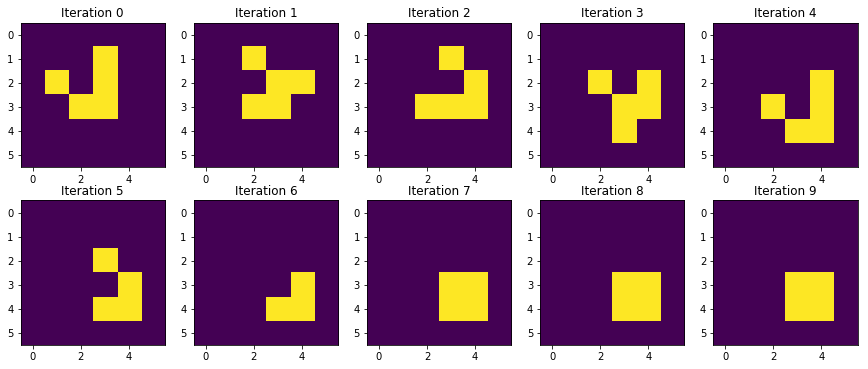

In [11]:
from utils import iteration_jeu_np
# DO NOT REPORT THIS... COMPILATION TIME IS INCLUDED IN THE EXECUTION TIME!
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu_np)
end = time.time()
print("Elapsed (including compilation) = %s" % (end - start))

Elapsed (after compilation) = 0.35397815704345703


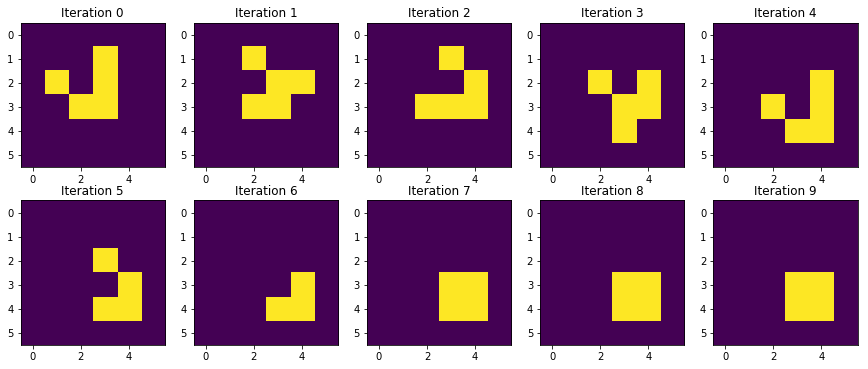

In [12]:
# NOW THE FUNCTION IS COMPILED, RE-TIME IT EXECUTING FROM CACHE.
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu_np)
end = time.time()
print("Elapsed (after compilation) = %s" % (end - start))

Elapsed (not using numba.jit()) = 0.28353238105773926


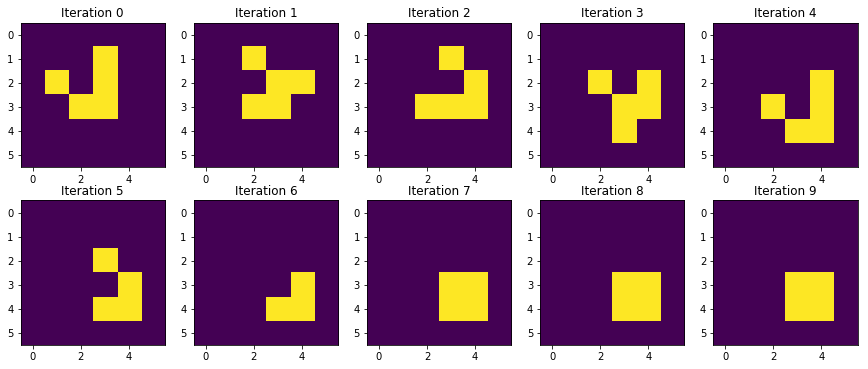

In [13]:
# NOT USING NUMBA.JIT() TO COMPARE RUNNING TIMES. 
start = time.time()
plotJeuDeLaVie(10,Z_np,iteration_jeu)
end = time.time()
print("Elapsed (not using numba.jit()) = %s" % (end-start))

On ne voit pas que c'est plus efficace à utiliser jit dans ce cas là.

### Question 8

In [65]:
def plotJeuDeLaVie_manySP(nbIterations,Z,iter_func):
    """
    Plotting the evolution of the matrices of Jeu de La Vie.
    """
    Zcopy = Z.copy()
    plt.figure(figsize=(15,15))
    for i in range(6):
        for j in range(5):
            if ((i*5+j)>=nbIterations):
                break
            plt.subplot2grid((6,5), (i,j)) # Have to use subplot2grid instead of subplot for > 10 subplots.
            plt.title("iteration "+str(i*5+j))
            if (i==0 and j==0):
                plt.imshow(Zcopy)
            else:
                Zcopy = iter_func(Zcopy)
                plt.imshow(Zcopy)
    plt.tight_layout()

In [60]:
from ipywidgets import interact,fixed
from utils import iteration_jeu_np

interact(plotJeuDeLaVie_manySP, nbIterations=(0,30,1),Z=fixed(Z_np),iter_func = fixed(iteration_jeu_np))

interactive(children=(IntSlider(value=15, description='nbIterations', max=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plotJeuDeLaVie_widget>

In [71]:
n = 20
Z_huge = np.zeros((n,n))
Z_huge[10:16,10:16] = Z_np

interact(plotJeuDeLaVie_manySP,nbIterations=(0,30,1),Z=fixed(Z_huge),iter_func = fixed(iteration_jeu_np))

interactive(children=(IntSlider(value=15, description='nbIterations', max=30), Output()), _dom_classes=('widget-interact',))

<function __main__.plotJeuDeLaVie_manySP>

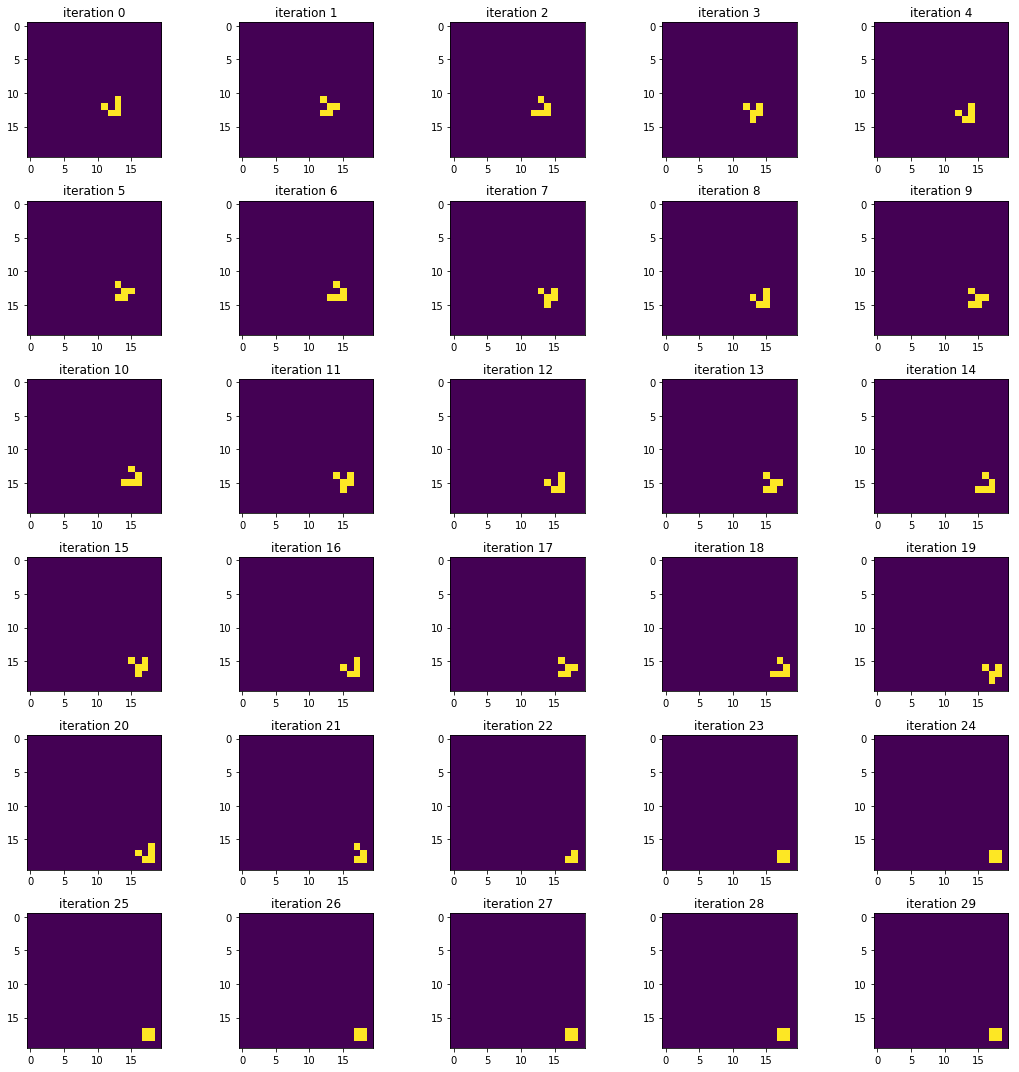

In [69]:
plotJeuDeLaVie_manySP(50,Z_huge,iteration_jeu_np)

Avec $n=20$, la matrice `Z_huge` converge au 24 iteration. 

## Exercice 2 - Régression logistique

### Question 1:

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [5]:
X = mnist.data.astype('float64') 
y = mnist.target.astype('float64')

### Question 2:

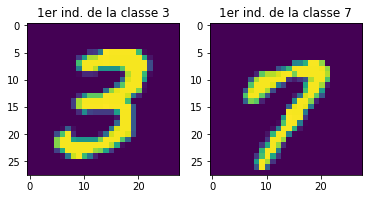

In [6]:
# On garde que les 3 et 7
X = X[(y==3) + (y==7)] 
y = y[(y==3) + (y==7)] 

# Premier individu de la classe 3 et 7
premier_3 = np.where(y==3)[0][0]
premier_7 = np.where(y==7)[0][0]

# On affiche les 2 individus
plt.subplot(1, 2, 1)
plt.title("1er ind. de la classe 3")
plt.imshow(X[premier_3].reshape(28,28))
plt.subplot(1, 2, 2)
plt.title("1er ind. de la classe 7")
plt.imshow(X[premier_7].reshape(28,28))

### Question 3:

In [7]:
from sklearn.linear_model import LogisticRegression 

# Regression logistique 
reg_log = LogisticRegression(fit_intercept=False, solver='liblinear').fit(X, y)

### Question 4:

In [8]:
from ipywidgets import interact, fixed
from utils import fig_digit 

In [9]:
# Nous avons fait varier alpha de 1 en 1 pour plus de fluidité
interact(fig_digit, x=fixed(X[premier_7]), w=fixed(reg_log.coef_), alpha=(0,100,1));

interactive(children=(IntSlider(value=50, description='alpha'), Output()), _dom_classes=('widget-interact',))

### Question 5:

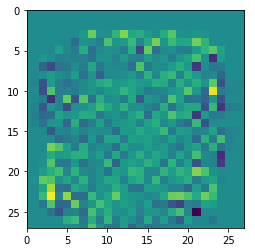

In [11]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 27), ylim=(27, 0))
ims = []

for i in range(100):
    im = fig_digit(X[premier_7], reg_log.coef_, i)
    ims.append([im])
    
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

anim.to_html5_video()
plt.show()